## DTSA 5509 - Final Project

**Introduction/Topic** 

For my supervised project, I chose a classification problem because I enjoy analyzing diverse data inputs to make a clear determination about the nature of an observation.

For this project, I focused on the well-known mushroom classification dataset. While mushrooms can be classified in various ways (e.g., by species or habitat), one of the most engaging and widely recognized challenges in machine learning involves determining whether a mushroom is edible or poisonous based on its characteristics.

In this assignment, I utilized classification decision trees and random forests to approach the problem. This type of analysis has practical implications for the natural sciences and could also benefit hobbyists, such as mushroom foragers, collectors, and culinary enthusiasts

In [8]:
import pandas as pd
import numpy as np
import math
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

<ipython-input-8-0ee1bef84dee>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


**Data**

This dataset originates from the UCI Machine Learning Repository and was later made available on Kaggle. Initially donated in 1987, it was uploaded to Kaggle in 2016 and is shared under a Creative Commons Public Domain license. The file is relatively small, with a size of 374kB in .csv format.

For this project, I downloaded the dataset and re-uploaded it to my GitHub repository for accessibility and easy reference. The original source and proper citation are provided below. As mentioned earlier, this dataset is widely used for classification tasks, offering numerous potential resources for exploration.

Upon inspecting the data, we find 8,124 rows (entries/observations) and 23 columns. The first column, "class," serves as the target (y/dependent) variable for this problem, leaving 22 additional features. All columns are of the data type "object," and the first five rows reveal that the features are encoded as letters. The encoding details can be referenced on the Kaggle page where the dataset is hosted.

In [9]:
df = pd.read_csv("mushrooms.csv")
print(df.head())

# Inspect the data to learn about size and type
df.describe()
df.info()

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

**Data cleaning**

To clean the dataset, I began by checking for null values. Using df.info(), I confirmed that all columns are complete, with no missing values. This is further validated by running a script that prints each column name alongside its count of null values, which correctly outputs all zeros.

This finding is also reflected in the visualization provided. Additionally, it’s important to note that there are no encoded values representing "None" that require special handling. For example, the "odor" feature includes observations coded as "none," but this is an integral part of the feature's data and not a null value in the conventional sense.

class 0
cap-shape 0
cap-surface 0
cap-color 0
bruises 0
odor 0
gill-attachment 0
gill-spacing 0
gill-size 0
gill-color 0
stalk-shape 0
stalk-root 0
stalk-surface-above-ring 0
stalk-surface-below-ring 0
stalk-color-above-ring 0
stalk-color-below-ring 0
veil-type 0
veil-color 0
ring-number 0
ring-type 0
spore-print-color 0
population 0
habitat 0


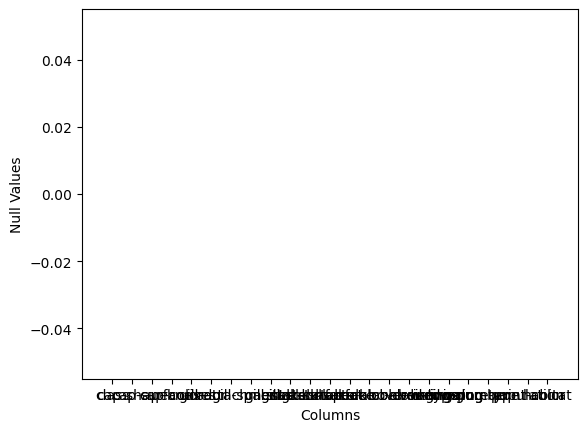

In [10]:
# Clean the data
cols = []
nulls = []

for col in df.columns:
    num = df[col].isnull().sum()
    cols.append(col)
    nulls.append(num)
    print(col, num)


plt.xlabel("Columns")
plt.ylabel("Null Values")
plt.bar(cols, nulls)
plt.show() 

The final step in data cleaning involves transforming the data into a format suitable for classification models. Since these models cannot directly process the coded letters in the dataset, and converting them to numbers could misleadingly imply an ordinal relationship (instead of their actual categorical nature), I opted to use one-hot encoding.

One-hot encoding expands categorical features into multiple binary columns. Each unique value within a feature is represented as a separate column, with entries marked as "1" (indicating the feature matches that value) or "0" (indicating it does not). For this dataset, one-hot encoding was applied only to the features, excluding the target classification column. As a result, the 22 original features expanded into 95 columns.

To improve efficiency and prevent issues like collinearity, the drop_first=True parameter was used. This excludes one of the possible encoded columns for each feature, reducing redundancy and ensuring the encoded data is more suitable for analysis.

In [11]:
## See what the unique values are for each of our columns.
for col in df.columns:
  print(col, df[col].unique())

## Create transformed data using one-hot encoding for all 22 feature columns.
df_transformed = pd.get_dummies(df[['cap-shape','cap-surface','cap-color','bruises','odor',
                                    'gill-attachment','gill-spacing','gill-size','gill-color',
                                    'stalk-shape','stalk-root','stalk-surface-above-ring',
                                    'stalk-surface-below-ring','stalk-color-above-ring',
                                    'stalk-color-below-ring','veil-type','veil-color',
                                    'ring-number','ring-type','spore-print-color','population','habitat'
                                    ]],drop_first=True)

## Take a quick peek at our transformed/cleaned dataset.
print(df_transformed.head())

class ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']
   cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  cap-shape_x  \
0        False        False        False        False         True   
1        False        False        Fal

In [12]:
# First pull out features and final classification
df_x = df_transformed#.drop(labels="class", axis = 1)
df_y = df["class"].copy()

# Split into test/train set
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(df_x, df_y, train_size=0.75)

## Convert our y data into arrays.
y_train = np.array(y_train)
y_test = np.array(y_test)

## Double check the size of our different inputs and outputs to confirm size.
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

6093
6093
2031
2031


**Data Explanation**

After encoding and splitting the data, the dataset is divided as follows: the training set contains 6,093 observations, and the test set has 2,031 observations, representing a 3:1 split.

Below, I present a correlation matrix for the transformed dataset. Examining correlations in this newly encoded dataset is crucial since one-hot encoding has expanded and restructured the features.

Additionally, I've selected a few key features from the original dataset and created histogram plots. These plots provide insight into how observations are distributed across the various possible values for these features.

In [13]:
## Correlation Matrix for our transformed dataset.
import seaborn as sns 

plt.figure(figsize=(12,10))
ax = sns.heatmap(df_transformed.corr())

<class 'ModuleNotFoundError'>: No module named 'seaborn'

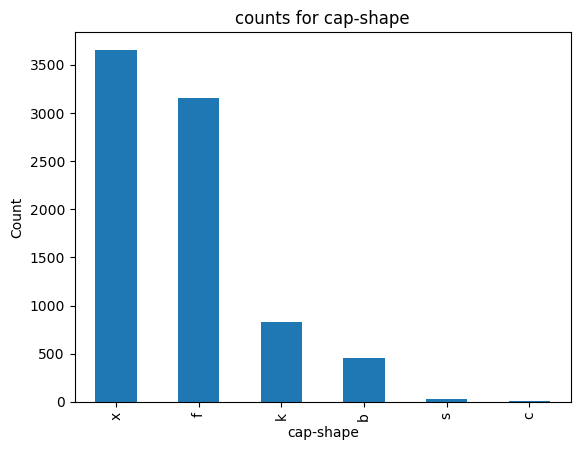

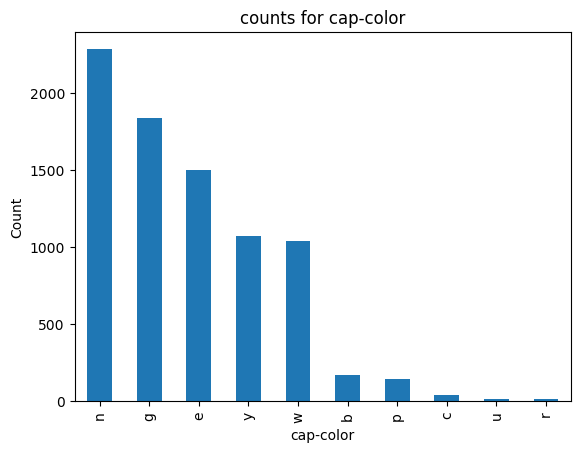

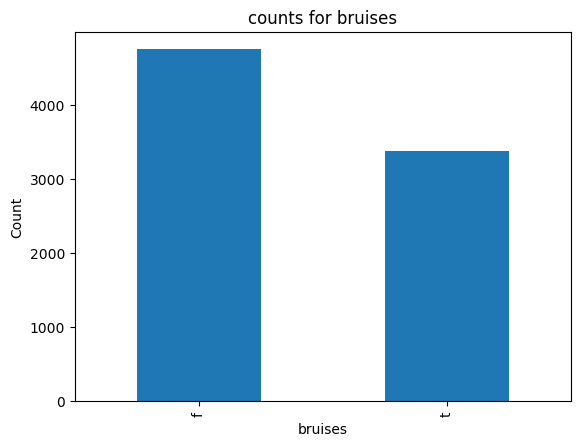

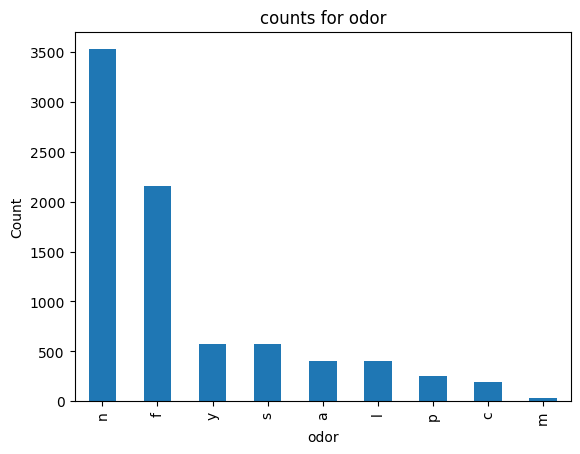

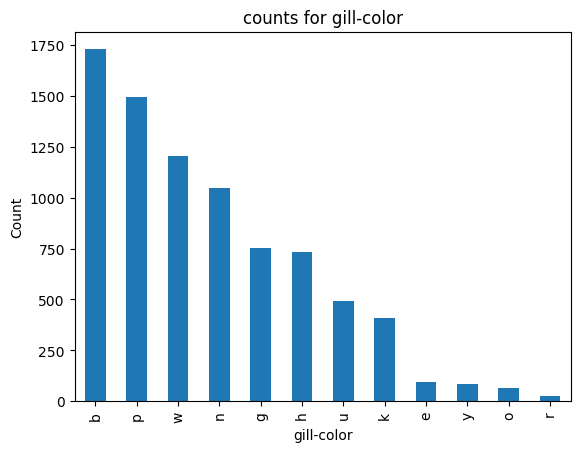

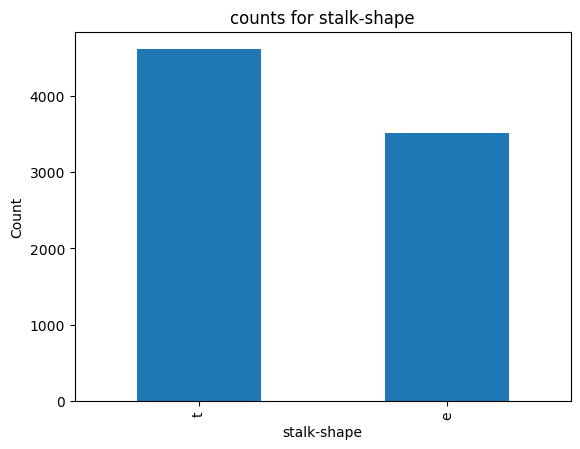

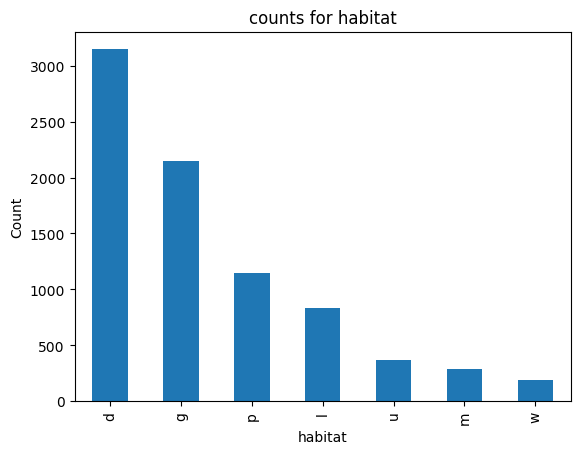

In [14]:
## Select a few key attributes/features
feats = ['cap-shape','cap-color','bruises','odor','gill-color','stalk-shape','habitat']

## Loop through to plot relevant histograms
for i in feats:
  plt.xlabel(i)
  plt.ylabel("Count")
  title1 = ("counts for "+i)
  plt.title(title1)
  df[i].value_counts().plot(kind='bar')
  plt.show() 

**Enabling data models**

Given the nature of the problem, I began with a single model and then progressed to a more advanced approach. Initially, I implemented a decision tree using all available features. Thanks to the drop_first=True parameter in the one-hot encoding process, multicollinearity is not a concern at this stage.

Using the DecisionTreeClassifier from scikit-learn, I applied the appropriate decision tree model for this classification task.

In [15]:
## Let's start with a decision tree
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

## Our first model is fit with the training data.
model1 = DecisionTreeClassifier()
model1.fit(x_train, y_train)

DecisionTreeClassifier()

In [16]:
## And let's check the scores on our training and testing data.
print(model1.score(x_train, y_train))
print(model1.score(x_test, y_test))

1.0
1.0


Excellent—we've established a strong classifier using the default parameters.

Now, let’s proceed with hyperparameter tuning. We'll start by testing 10 different values for max_depth to evaluate how the accuracy changes with varying tree depths.

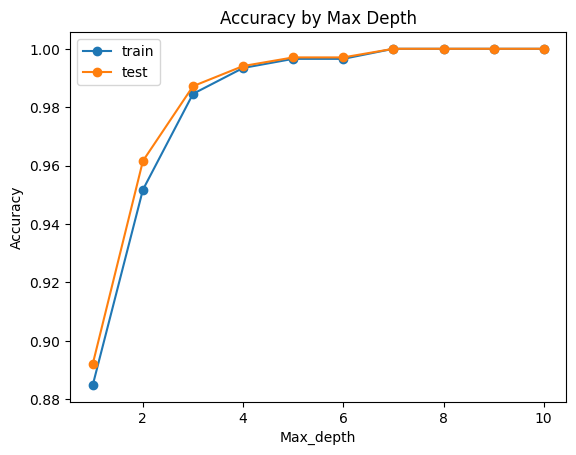

In [17]:
## Initiate.
xs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
yts = []
ytss = []

## Loop through our model, fitting it, and appending our scores.
for i in xs:
  mdl = DecisionTreeClassifier(criterion='gini', max_depth=i)
  mdl.fit(x_train, y_train)
  yts.append(mdl.score(x_train, y_train))
  ytss.append(mdl.score(x_test, y_test))

## Plot our results.
plt.xlabel("Max_depth")
plt.ylabel("Accuracy")
plt.title("Accuracy by Max Depth")
plt.plot(xs, yts, marker='o', label="train")
plt.plot(xs, ytss, marker='o', label="test")
plt.legend()
plt.show() 

The most significant improvements in accuracy occur when increasing the depth from 1 to 2 layers and from 2 to 3 layers. By around 5 layers, the accuracy nearly reaches its maximum.

Next, we’ll perform a similar analysis for the max_leaf_nodes parameter. Note that we must start with a minimum of 2, as a maximum of 1 leaf node is not valid.

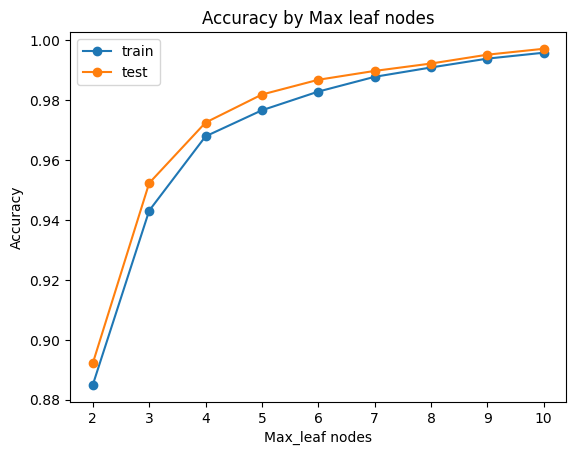

In [18]:
## Initiate.
xs = [2, 3, 4, 5, 6, 7, 8, 9, 10]
yts = []
ytss = []

## Loop through, build the classifier, and append the score.
for i in xs:
  mdl = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=i)
  mdl.fit(x_train, y_train)
  yts.append(mdl.score(x_train, y_train))
  ytss.append(mdl.score(x_test, y_test))

## Plot our results.
plt.xlabel("Max_leaf nodes")
plt.ylabel("Accuracy")
plt.title("Accuracy by Max leaf nodes")
plt.plot(xs, yts, marker='o', label="train")
plt.plot(xs, ytss, marker='o', label="test")
plt.legend()
plt.show() 

Here, we observe a more gradual improvement in accuracy as the number of maximum leaf nodes increases. However, similar to max_depth, near-perfect accuracy is achieved within the first 10 values of max_leaf_nodes. This parameter generally requires a higher minimum setting compared to max_depth.

To determine the optimal values, we can perform a grid search to identify the best combination of parameters.

In [19]:
## Import library needed for grid search.
from sklearn.model_selection import GridSearchCV

## Set up our dictionaries of parameters and fit the grid search.
params = {'max_leaf_nodes': list(range(2, 20)), 'max_depth': list(range(1, 20))}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(), params, verbose=1, cv=3)
grid_search_cv.fit(x_train, y_train)
print(grid_search_cv.best_estimator_)

Fitting 3 folds for each of 342 candidates, totalling 1026 fits
DecisionTreeClassifier(max_depth=7, max_leaf_nodes=16)


In [20]:
## Using the grid search best_estimator_ outputs above, we can now train and test on a new model, outputting our accuracies.
model2 = DecisionTreeClassifier(max_depth=6, max_leaf_nodes=16)
model2.fit(x_train, y_train)
print(model2.score(x_train, y_train))
print(model2.score(x_test, y_test))

0.9965534219596258
0.9970457902511078


And now let's visualize this "final" tree.

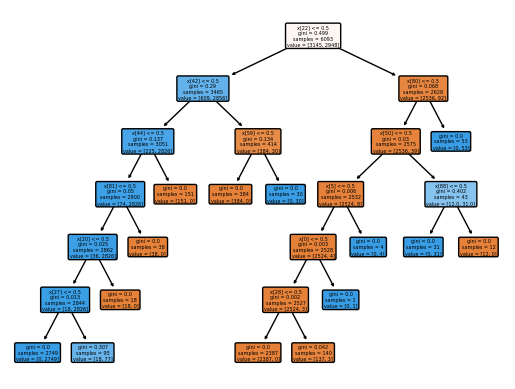

In [33]:
## Import the necessary libraries. 
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image, display
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

## And create our decision tree.
#dot_data = StringIO()
plt.figure()
plot_tree(model2, filled=True, rounded = True)
plt.show()

Having built a decision tree and optimized it through hyperparameter tuning with grid search, let’s now take a different approach. Below, we construct a random forest using the relevant module from scikit-learn. 

In [34]:
## Import necessary libraries. 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

## Let's build our random forest model.
rf_model = RandomForestClassifier(max_depth=1)
rf_model.fit(x_train, y_train)

## And now print our accuracies.
print(rf_model.score(x_train, y_train))
print(rf_model.score(x_test, y_test))

0.9149844083374364
0.9202363367799113


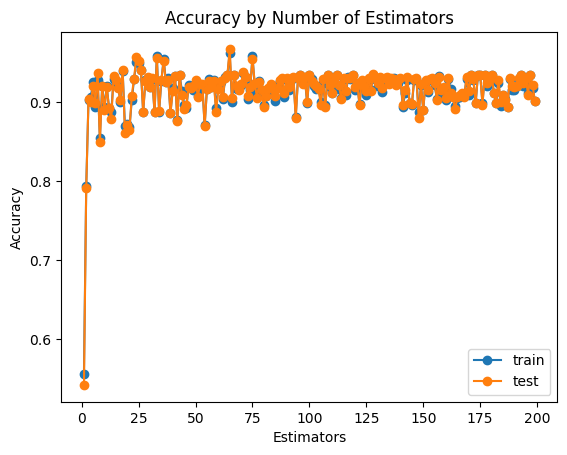

In [35]:
## And let's tune some hyperparameters again, namely, the number of estimators.
xs = list(range(1, 200))
yts = []
ytss = []

## Loop through, build the classifier, and append the score.
for i in xs:
  mdl = RandomForestClassifier(max_depth=1, n_estimators=i)
  mdl.fit(x_train, y_train)
  yts.append(mdl.score(x_train, y_train))
  ytss.append(mdl.score(x_test, y_test))

## Plot our results.
plt.xlabel("Estimators")
plt.ylabel("Accuracy")
plt.title("Accuracy by Number of Estimators")
plt.plot(xs, yts, marker='o', label="train")
plt.plot(xs, ytss, marker='o', label="test")
plt.legend()
plt.show() 

**Discussion/Results**

Using the two classifiers above, we observed some fascinating trends. Let’s start with the fundamentals.

At a high level, we compared two classification models: a decision tree and a random forest, aiming to classify mushrooms as edible or poisonous. While an accuracy score of 1.0 would be ideal, the decision tree came closest to achieving this.

*Decision Tree*

The decision tree achieved near-perfect accuracy. After performing a grid search, the training dataset reached an accuracy of 0.99967, while the test dataset achieved 0.99951 under the same parameters. Visualizations in the previous section illustrate how accuracy evolved with different parameters, along with a depiction of the “best” decision tree, which had a maximum depth of 7 and 15 maximum leaf nodes.

However, there’s a possibility of overfitting. In an earlier iteration of the project, I adjusted the train/test split to intentionally “underfit” the data by training on a small subset of observations and testing on the remaining data. As expected, the testing accuracy declined, highlighting the importance of balancing the dataset.

*Random Forest*

Interestingly, despite the decision tree's performance, the random forest model did not outperform it in terms of accuracy. Initial accuracy for both training and testing hovered around 0.91–0.92. By iterating over the number of estimators (ranging from 1 to 200), the maximum achievable accuracy for the random forest was approximately 0.96, but the results showed more variability.

This difference is likely due to the dataset's structure, which contains a large number of sparse features. While random forests often excel with richer feature sets, the decision tree's straightforward splitting approach performed better in this context.

*Focus on Accuracy*

Throughout this analysis, I prioritized the accuracy score—the ratio of correct predictions to total observations. Why focus so heavily on this metric? The answer lies in the nature of the problem.

Here, the goal is to classify mushrooms as edible or poisonous based on their characteristics. Given the one-hot encoding of the dataset, many features are sparse, making metrics like ROC-AUC less relevant. Furthermore, misclassifying a poisonous mushroom as edible is a far more severe error than the reverse. In this context, accuracy provides a balanced and practical measure for comparing models, ensuring reliable performance across the board.

**Concluding Thoughts**

*What Did We Learn?*
Overall, we learned that "going bigger" with more complex models does not always yield better results. While this may seem counterintuitive, it makes sense in this case due to the nature of the sparse data. Because of the one-hot encoding applied to categorical variables, the random forest model required a large number of estimators to achieve reasonable accuracy. Simpler models, such as the decision tree, were better suited to this particular dataset.

*What Didn’t Work?*
Interestingly, the dataset was almost "too clean." With more time and computational resources, a potential future improvement would involve using feature selection techniques, such as stepwise feature engineering, to identify the most relevant features for the target variable. Although this step was beyond the scope of the current project due to time constraints, it could significantly streamline the dataset.

By reducing the number of features before data transformation, we could simplify the model inputs and potentially improve the performance of more complex algorithms like random forests. This approach would give random forests a better chance of matching the decision tree’s performance. That said, for a relatively straightforward dataset like this one, the decision tree proved to be an excellent choice.

*How Is This Relevant?*
This project highlighted the value of working with a dataset that, in some ways, could be "solved." Using default parameters, it was possible to construct a decision tree with near-perfect accuracy. What’s particularly striking is that the dataset was derived from natural-world observations, which often introduce randomness and variability. Achieving such consistent results in this context is notable.

The findings from this project have practical implications. For example, an input algorithm could be developed, allowing users to upload information about a specific observation—such as a mushroom they find in the wild—and determine whether it is edible or poisonous based on a subset of its characteristics. This concept could be extended to a computer vision application, where image-based machine learning is used to feed inputs into a decision tree for classification.

**Data source citation**

Kaggle URL: https://www.kaggle.com/uciml/mushroom-classification